<h1>Brain Tumor image Visualization and Classification (MRI)</h1>

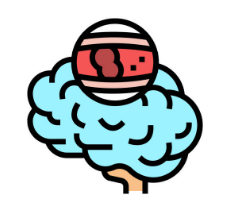

<h3>Content</h3>

- Brain Tumor types
- Library
- Loading the dataset
- Data analysis
- Image visualisation
- Image preprocessing
- Modelling

<h2>Brain Tumor types</h2>

<h3>Glioma Tumor</h3>

A glioma is a type of brain tumor that starts from glial cells, which are cells that surround and support nerve cells in the brain and spinal cord. There are different types of gliomas, such as astrocytoma, glioblastoma, oligodendroglioma and ependymoma. Some gliomas are benign, which means they do not spread to other parts of the body. Others are malignant, which means they grow quickly and invade healthy tissue. Gliomas can cause various symptoms depending on where they are located in the brain or spinal cord, such as headaches, nausea, confusion, memory loss, vision problems, speech difficulties and seizures. Gliomas can affect people of any age, but they are more common in adults than in children. The treatment options for gliomas may include surgery, radiation therapy, chemotherapy and other therapies.

<h3>Meningioma Tumor</h3>

Meningioma is a type of brain tumor that starts from the meninges, the membranes that cover the brain and spinal cord. Meningiomas are usually benign, which means they do not spread to other parts of the body, but they can cause symptoms such as headaches, vision problems, seizures and memory loss. Meningiomas are the most common type of tumor that forms in the head and affect more women than men. The treatment options for meningiomas may include surgery, radiation therapy or watchful waiting.

<h3>Pituitary Tumor</h3>

A pituitary brain tumor is a type of tumor that develops in the pituitary gland, which is a small organ at the base of the brain that produces various hormones. A pituitary brain tumor is not technically a brain tumor, because the pituitary gland is not part of the brain, but it is close to it. Pituitary brain tumors can be benign or malignant, meaning they can be noncancerous or cancerous. Most pituitary brain tumors are benign and do not spread to other parts of the body. Pituitary brain tumors can cause different symptoms depending on their size and the type of hormones they produce. Some of the symptoms may include headaches, vision problems, nausea, fatigue, mood changes, infertility and sexual dysfunction.. Pituitary brain tumors can be diagnosed by blood tests, urine tests, MRI scans, CT scans and vision test.

<h2>Libraries</h2>

In [1]:
import os
import cv2
import glob
import random
import imageio
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import skimage.measure   
import tensorflow as tf
from skimage import data
import albumentations as A
import scipy.ndimage as ndi
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from tensorflow.keras import regularizers
from skimage.measure.entropy import shannon_entropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam , Adamax
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix , classification_report
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense,BatchNormalization

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h2>Loading the dataset</h2>

In [2]:
#Train
train_glioma = glob.glob('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/*.jpg')
train_menignioma = glob.glob('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/*.jpg')
train_pituitary = glob.glob('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/*.jpg')
train_no = glob.glob('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/*.jpg')

#Test
test_glioma = glob.glob('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/*.jpg')
test_menignioma = glob.glob('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/*.jpg')
test_pituitary = glob.glob('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/*.jpg')
test_no = glob.glob('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/*.jpg')

<h2>Data analysis</h2>

In [3]:
train_glioma_number = len(train_glioma)
train_menignioma_number = len(train_menignioma)
train_pituitary_number = len(train_pituitary)
train_no_number = len(train_no)

test_glioma_number = len(test_glioma)
test_menignioma_number = len(test_menignioma)
test_pituitary_number = len(test_pituitary)
test_no_number = len(test_no)

print("Number of train_glioma: ",train_glioma_number)
print("Number of train_menignioma: ",train_menignioma_number)
print("Number of train_pituitary: ",train_pituitary_number)
print("Number of train_no: ",train_no_number)
print("Number of test_glioma: ",test_glioma_number)
print("Number of test_menignioma: ",train_menignioma_number)
print("Number of test_pituitary: ",train_pituitary_number)
print("Number of test_no: ",train_no_number)

Number of train_glioma:  826
Number of train_menignioma:  822
Number of train_pituitary:  822
Number of train_no:  395
Number of test_glioma:  100
Number of test_menignioma:  822
Number of test_pituitary:  822
Number of test_no:  395


In [70]:
data_path = '/kaggle/input/newbigdata/Bdika'

filepaths =[]
labels = []

folds = os.listdir(data_path)

for fold in folds:
    f_path = os.path.join(data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
data_df = pd.concat([Fseries , Lseries] , axis = 1)

In [71]:
data_df.info()
class_counts = data_df['label'].value_counts()
print(class_counts)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  14000 non-null  object
 1   label      14000 non-null  object
dtypes: object(2)
memory usage: 218.9+ KB
label
no_tumor            3500
pituitary_tumor     3500
meningioma_tumor    3500
glioma_tumor        3500
Name: count, dtype: int64


<h3>Split dataset</h3>

In [72]:
train_df , test = train_test_split(data_df , train_size = 0.8 , shuffle = True , random_state= 42)
train_df ,valid  = train_test_split(train_df , train_size = 0.8 , shuffle = True , random_state= 42)


In [86]:
print(len(train_df))
print(len(test))
print(len(valid))

8960
2800
2240


<h3>Image resize and generation</h3>

In [109]:
img_size = (220 ,220)#This defines a variable called img_size that stores a tuple of two integers, 220 and 220. This will be used as the target size for resizing the images.
batch_size = 15 # This defines a variable called batch_size that stores an integer, 16. This will be used as the number of images per batch.

tr_gen = ImageDataGenerator()#This creates an instance of the ImageDataGenerator class and assigns it to a variable called tr_gen. This will be used to create the train_gen object later. By default, this does not apply any preprocessing or augmentation to the images, but you can pass some arguments to the constructor to customize it.
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size , 
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size , 
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 8960 validated image filenames belonging to 4 classes.
Found 2240 validated image filenames belonging to 4 classes.
Found 2800 validated image filenames belonging to 4 classes.


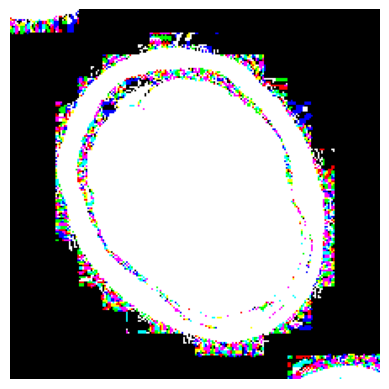

In [112]:
import matplotlib.pyplot as plt
import numpy as np

def display_processed_image(image):
    # אם התמונה בפורמט uint8 (בטווח 0-255), נצטרך להמיר את הערכים לטווח 0-1
    if image.dtype == np.uint8:
        image = image.astype(float) / 255.0
    
    plt.imshow(image)
    plt.axis('off')  # להסיר את הצירים
    plt.show()

# לדוגמה, נשתמש בפונקציה עם images[1]
display_processed_image(images[1])


<h2>Modelling</h2>

<h3>Model architecture</h3>

In [110]:
img_size = (220 ,220)
batch_size = 15 

tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size , 
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size , 
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet' ,

                                                               input_shape = img_shape, pooling= 'max')
model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

#optimizer
model.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Epochs = 50
start_time = time.time()

history = model.fit(x= train_gen , epochs = Epochs , verbose = 1 , validation_data = valid_gen ,
                   validation_steps = None , shuffle = False)

end_time = time.time()


In [9]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet' ,

                                                               input_shape = img_shape, pooling= 'max')
model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

#optimizer
model.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()



43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 11,184,179
Trainable params: 11,093,804
Non

<h3>Model training</h3>

In [10]:
import time

In [11]:
Epochs = 50
start_time = time.time()

history = model.fit(x= train_gen , epochs = Epochs , verbose = 1 , validation_data = valid_gen ,
                   validation_steps = None , shuffle = False)

end_time = time.time()


Epoch 1/50


2024-04-03 10:45:03.778834: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


598/598 [==============================] - 189s 211ms/step - loss: 5.1850 - accuracy: 0.8780 - val_loss: 2.7894 - val_accuracy: 0.9879
Epoch 2/50
598/598 [==============================] - 118s 197ms/step - loss: 1.7779 - accuracy: 0.9715 - val_loss: 0.9550 - val_accuracy: 0.9951
Epoch 3/50
598/598 [==============================] - 117s 195ms/step - loss: 0.6403 - accuracy: 0.9862 - val_loss: 0.3711 - val_accuracy: 0.9964
Epoch 4/50
598/598 [==============================] - 118s 197ms/step - loss: 0.3158 - accuracy: 0.9866 - val_loss: 0.2038 - val_accuracy: 0.9964
Epoch 5/50
598/598 [==============================] - 119s 199ms/step - loss: 0.2113 - accuracy: 0.9910 - val_loss: 0.1682 - val_accuracy: 0.9964
Epoch 6/50
598/598 [==============================] - 119s 198ms/step - loss: 0.1685 - accuracy: 0.9939 - val_loss: 0.1319 - val_accuracy: 0.9969
Epoch 7/50
598/598 [==============================] - 118s 198ms/step - loss: 0.1442 - accuracy: 0.9959 - val_loss: 0.1170 - val_accura

In [12]:
total_time_seconds = end_time - start_time
total_time_minutes = total_time_seconds / 60  # Convert seconds to minutes
print("Total length of process:", total_time_minutes, "minutes")

Total length of process: 100.30863378842672 minutes


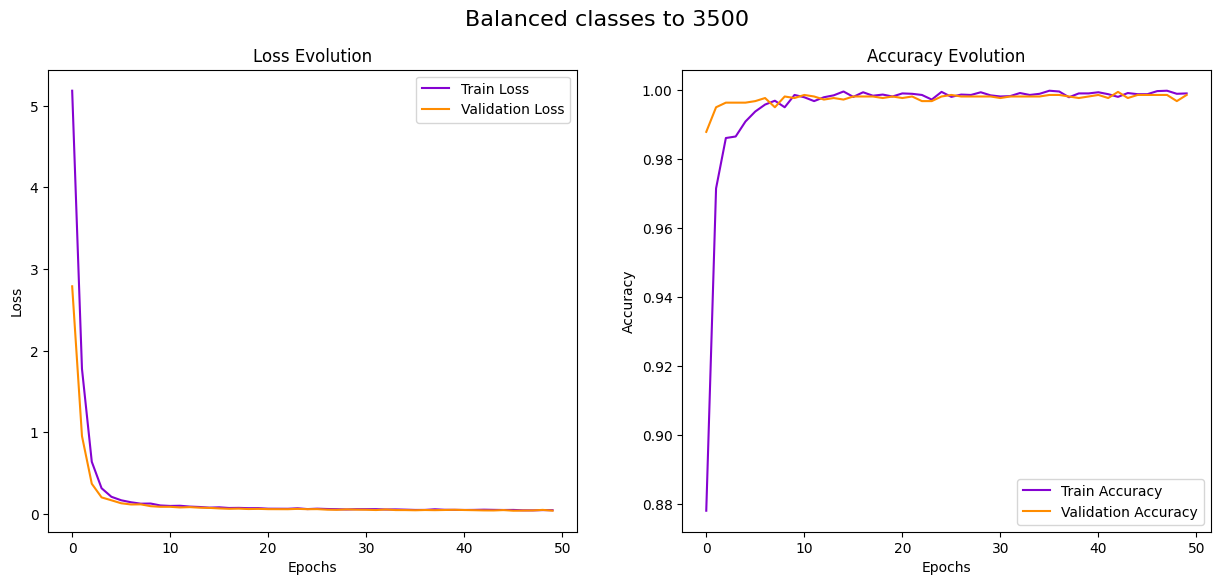

In [14]:
history_dict_op1 = history.history
val_loss_op1 = history_dict_op1['val_loss']
train_loss_op1 = history_dict_op1['loss']
val_accuracy_op1 = history_dict_op1['val_accuracy']
train_accuracy_op1 = history_dict_op1['accuracy']
plt.figure(figsize=(15,6))


# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_op1, label='Train Loss', color='#8502d1')
plt.plot(val_loss_op1, label='Validation Loss', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_op1, label='Train Accuracy', color='#8502d1')
plt.plot(val_accuracy_op1, label='Validation Accuracy', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.suptitle('Balanced classes to 3500 ', fontsize=16)

plt.show()

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
start_time_01 = time.time()
 #אבחן את הדיוק והפסד על נתוני הבדיקה
test_loss, test_acc = model.evaluate(test_gen, verbose=2)
end_time_01 = time.time()

print(f"Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss: {test_loss:.4f}")
total_time_seconds = end_time_01 - start_time_01
print("Time to run  a test : :", total_time_seconds, "seconds")


1/1 [==============================] - 0s 33ms/step


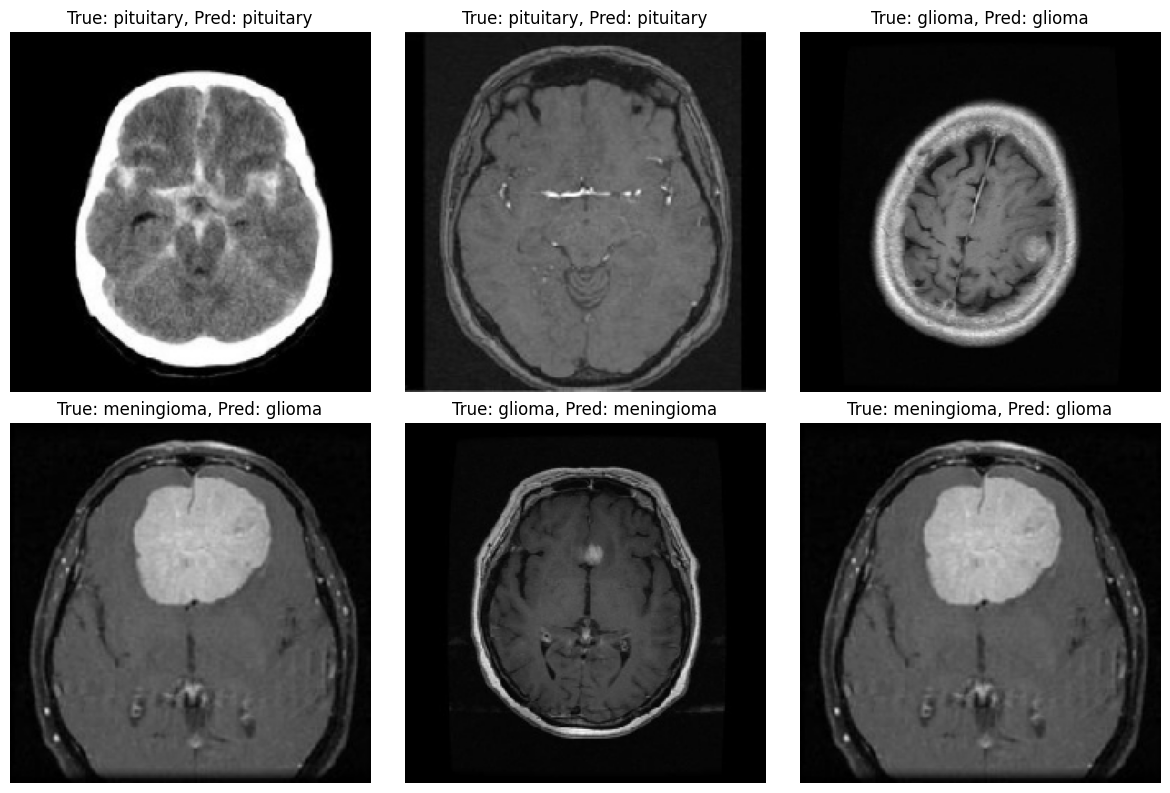

In [121]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['meningioma', 'glioma', 'pituitary', 'no tumor']

correct_count = 0
incorrect_count = 0

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # יצירת תמונה עם 2 שורות ו-3 עמודות

for i in range(len(test_gen)):
    batch = test_gen[i]  # איתור אצווה מהמבנה
    
    images = batch[0]
    true_labels = batch[1]
    predicted_labels = model.predict(images)  # הנחתי שיש לך מודל שכבר נדרש לו
    
    for j in range(len(true_labels)):
        true_label = true_labels[j].argmax()
        predicted_label = predicted_labels[j].argmax()
        
        image = images[j]  # השגת התמונה
        
        # המרה לטווח החוקי של ערכי התמונה
        if np.max(image) > 1.0:
            image = image / 255.0
        
        if true_label == predicted_label:
            if correct_count < 3:
                axs[0, correct_count].imshow(image)
                axs[0, correct_count].axis('off')
                axs[0, correct_count].set_title(f'True: {labels[true_label]}, Pred: {labels[predicted_label]}')
                correct_count += 1
        else:
            if incorrect_count < 3:
                axs[1, incorrect_count].imshow(image)
                axs[1, incorrect_count].axis('off')
                axs[1, incorrect_count].set_title(f'True: {labels[true_label]}, Pred: {labels[predicted_label]}')
                incorrect_count += 1
        
        if correct_count == 3 and incorrect_count == 3:
            break
    
    if correct_count == 3 and incorrect_count == 3:
        break

plt.tight_layout()
plt.show()


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# קבל את התחזיות והתוויות האמיתיות
y_pred = model.predict(test_gen)
y_true = test_gen.labels

# המר את התחזיות למספרים שלמים
y_pred = np.argmax(y_pred, axis=1)

# חשב את מטריצת הבלבול
conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_mat)

187/187 [==============================] - 7s 39ms/step
Confusion Matrix:
[[676   2   0   0]
 [  1 706   0   0]
 [  0   0 708   0]
 [  0   0   0 707]]


In [100]:
# יצירת מערכים ריקים לאחסון התוצאות
correct_predictions = []
incorrect_predictions = []

# הנחתי שיש לך מערכים y_true ו-y_pred של אורך זהה
for true_label, pred_label in zip(y_true, y_pred):
    if true_label == pred_label:
        correct_predictions.append(true_label)
    else:
        incorrect_predictions.append(true_label)
print("כמות התווים הנכונים:", len(correct_predictions))
print("כמות התווים הלא נכונים:", len(incorrect_predictions))


כמות התווים הנכונים: 2797
כמות התווים הלא נכונים: 3


In [77]:
test_pred_transfer=y_pred
print(classification_report(y_true,test_pred_transfer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       1.00      1.00      1.00       707
           2       1.00      1.00      1.00       708
           3       1.00      1.00      1.00       707

    accuracy                           1.00      2800
   macro avg       1.00      1.00      1.00      2800
weighted avg       1.00      1.00      1.00      2800



In [58]:
# חשב את המדדים השונים
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}") 
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9989
Recall: 0.9989
Precision: 0.9989
F1-Score: 0.9989


# דרך שונה 

In [36]:
start_time_01 = time.time()

# Generate predictions using the trained model on the test dataset
predictions_01 = model.predict(test_gen)
end_time_01 = time.time()

predicted_classes = np.argmax(predictions_01, axis=1)
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

187/187 [==============================] - 7s 38ms/step


In [32]:
total_time_seconds = end_time_01 - start_time_01
print("Time to perform a test : :", total_time_seconds, "seconds")

Time to perform a test : : 7.887049913406372 seconds


In [17]:

# Create the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

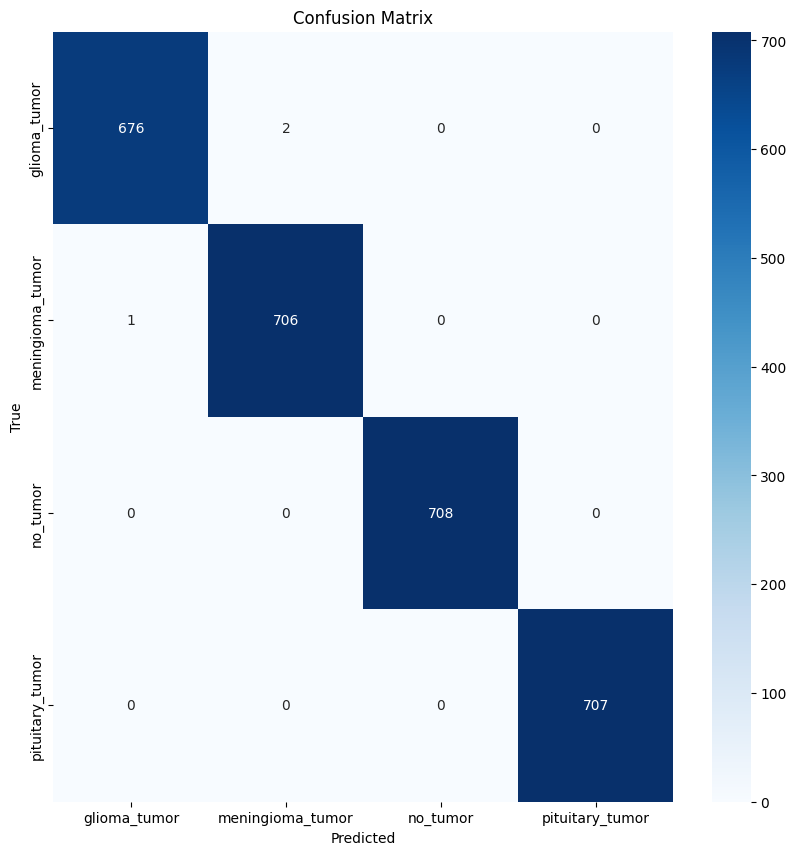

In [37]:


# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



# Calculate overall scores
accuracy_value = accuracy_score(true_classes, predicted_classes)
recall_value = recall_score(true_classes, predicted_classes, average='weighted')
precision_value = precision_score(true_classes, predicted_classes, average='weighted')
f1_score_value = f1_score(true_classes, predicted_classes, average='weighted')

# Print overall scores
print(f'Overall Accuracy: {accuracy_value:.4f}')
print(f'Overall Recall: {recall_value:.4f}')
print(f'Overall Precision: {precision_value:.4f}')
print(f'Overall F1-score: {f1_score_value:.4f}')


Overall Accuracy: 0.9989
Overall Recall: 0.9989
Overall Precision: 0.9989
Overall F1-score: 0.9989


In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [ ]:
# Calculate model performance
#accuracy_value, recalls_value, precisions_value, f1_scores_value = calculate_model_performance(true_classes, predicted_classes)

TypeError: 'numpy.float64' object is not iterable

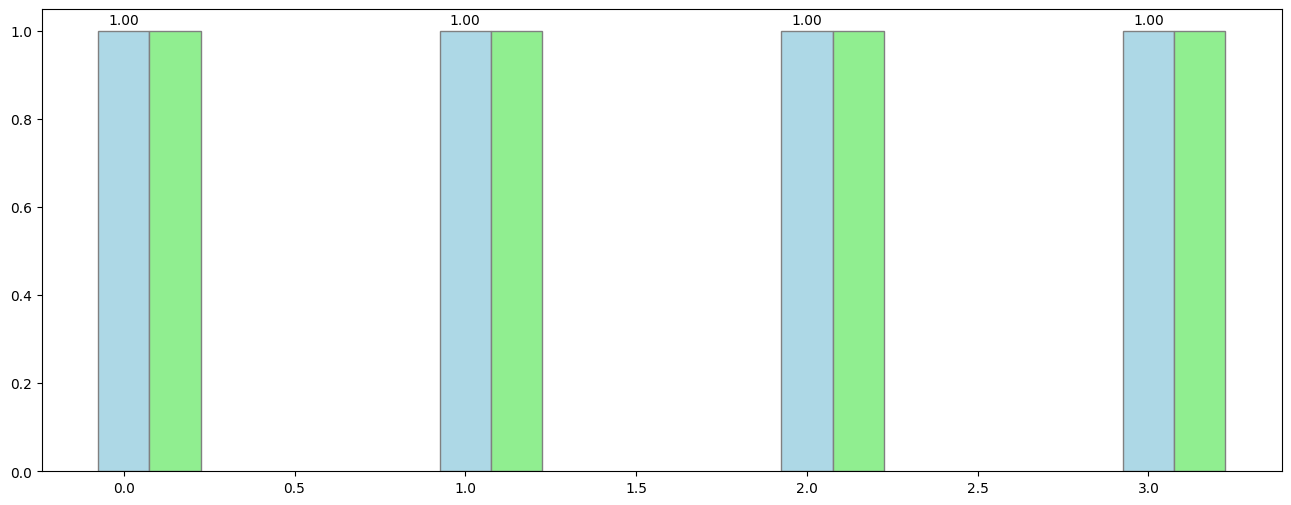

In [40]:
#גרף להצגת הנתונים
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
categories = class_labels
accuracy_scores = [accuracy_value, accuracy_value, accuracy_value, accuracy_value]
recall_scores = recall_value
precision_scores = precision_value
f1_scores = f1_score_value
class_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']  # Colors for different classes

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]
r4 = [x + bar_width*3 for x in r1]

# Create the figure and axis
plt.figure(figsize=(16, 6))
ax = plt.gca()

# Plotting the bars for each metric and class
for i, (metric, color, label) in enumerate(zip([accuracy_scores, recall_scores, precision_scores, f1_scores], 
                                               class_colors, ['Accuracy', 'Recall', 'Precision', 'F1-score'])):
    ax.bar(r1 + i*bar_width, metric, color=color, width=bar_width, edgecolor='grey', label=label)
    
    # Add numbers on top of the bars
    for j, value in enumerate(metric):
        ax.text(r1[j] + i*bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Model Performance Metrics by Measurement Method')
plt.xticks([r + bar_width*1.5 for r in range(len(categories))], categories)
plt.legend()

# Show plot
plt.show()


1/1 [==============================] - 2s 2s/step
Correctly Classified Images:
True Label: pituitary_tumor, Predicted Label: pituitary_tumor


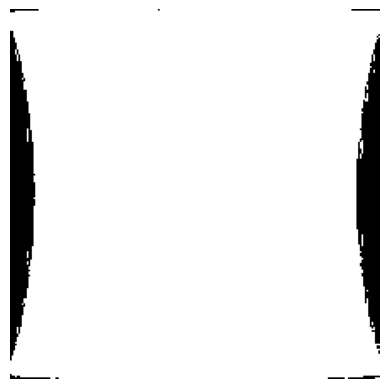

True Label: glioma_tumor, Predicted Label: glioma_tumor


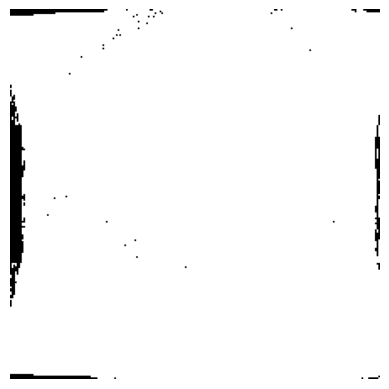

True Label: no_tumor, Predicted Label: no_tumor


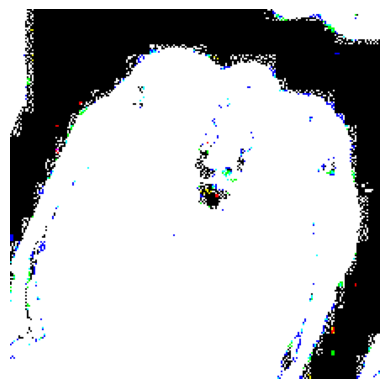


Incorrectly Classified Images:


In [47]:
# Get the first batch of images and labels from the test generator
images, labels = next(test_gen)

# Generate predictions using the trained model on the batch of images
predictions = model.predict(images)

# Get the predicted classes and true classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Get the indices of correctly and incorrectly classified images
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Display correctly classified images
print("Correctly Classified Images:")
for idx in correct_indices[:3]:
    true_label = class_labels[true_classes[idx]]
    predicted_label = class_labels[predicted_classes[idx]]
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.imshow(images[idx])
    plt.axis('off')
    plt.show()

# Display incorrectly classified images
print("\nIncorrectly Classified Images:")
for idx in incorrect_indices[:3]:
    true_label = class_labels[true_classes[idx]]
    predicted_label = class_labels[predicted_classes[idx]]
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.imshow(images[idx])
    plt.axis('off')
    plt.show()
